In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
predicate_count= {"and": 3477, "says": 2241, "belonging to": 3288, "over": 9317, "parked on": 2721, "growing on": 1853, "standing on": 14185, "made of": 2380, "part of": 2065, "attached to": 10190, "at": 9903, "in": 251756, "hanging from": 9894, "wears": 15457, "in front of": 13715, "from": 2945, "for": 9145, "lying on": 1869, "to": 2517, "behind": 41356, "flying in": 1973, "looking at": 3083, "on back of": 1914, "holding": 42722, "under": 22596, "laying on": 3739, "riding": 8856, "has": 277936, "across": 1996, "wearing": 136099, "walking on": 4613, "eating": 4688, "above": 47341, "watching": 3490, "walking in": 1740, "sitting on": 18643, "between": 3411, "covered in": 2312, "carrying": 5213, "using": 1925, "along": 3624, "with": 66425, "on": 712409, "covering": 3806, "of": 146339, "against": 3092, "mounted on": 2253, "near": 96589, "painted on": 3095, "playing": 3810}

predicate_to_idx = {"and": 5, "says": 39, "belonging to": 9, "over": 33, "parked on": 35, "growing on": 18, "standing on": 41, "made of": 27, "attached to": 7, "at": 6, "in": 22, "hanging from": 19, "wears": 49, "in front of": 23, "from": 17, "for": 16, "watching": 47, "lying on": 26, "to": 42, "behind": 8, "flying in": 15, "looking at": 25, "on back of": 32, "holding": 21, "between": 10, "laying on": 24, "riding": 38, "has": 20, "across": 2, "wearing": 48, "walking on": 46, "eating": 14, "above": 1, "part of": 36, "walking in": 45, "sitting on": 40, "under": 43, "covered in": 12, "carrying": 11, "using": 44, "along": 4, "with": 50, "on": 31, "covering": 13, "of": 30, "against": 3, "playing": 37, "near": 29, "painted on": 34, "mounted on": 28}

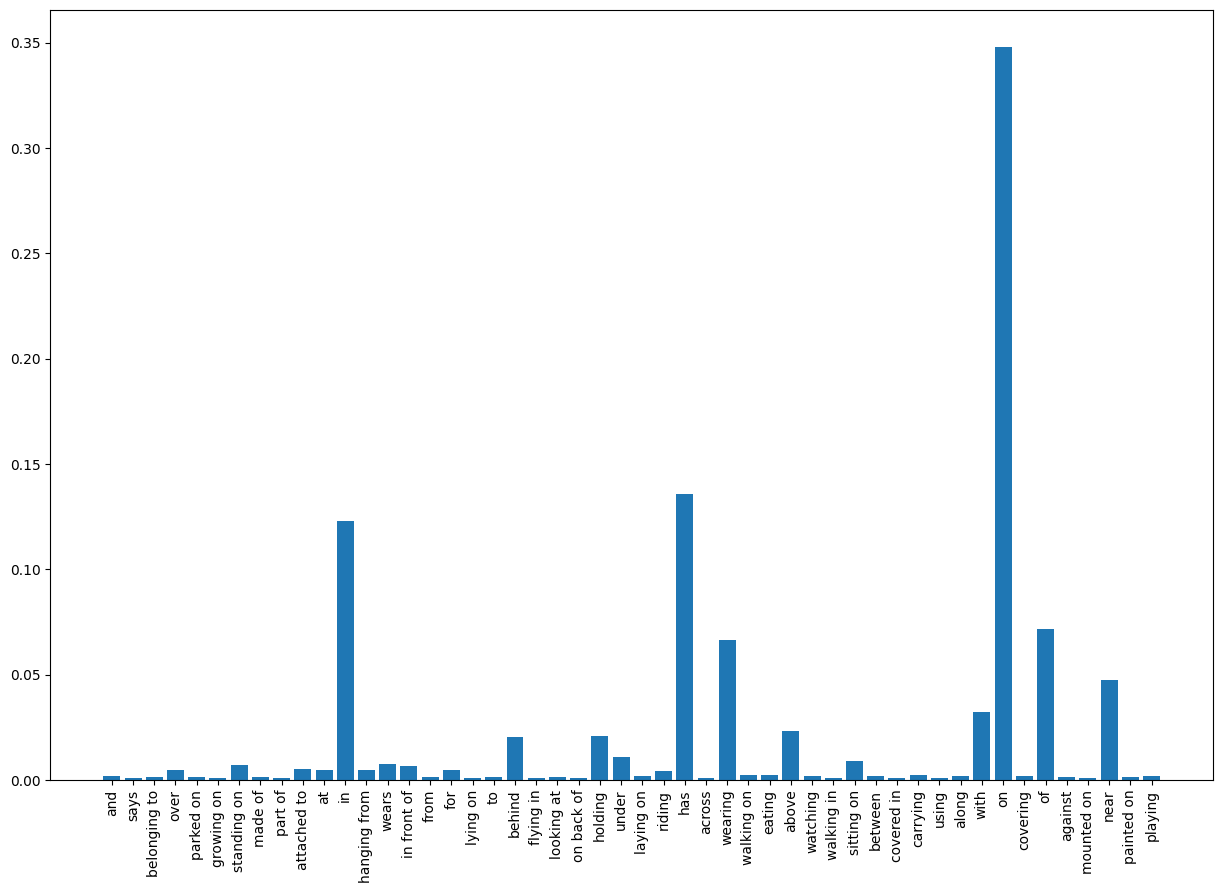

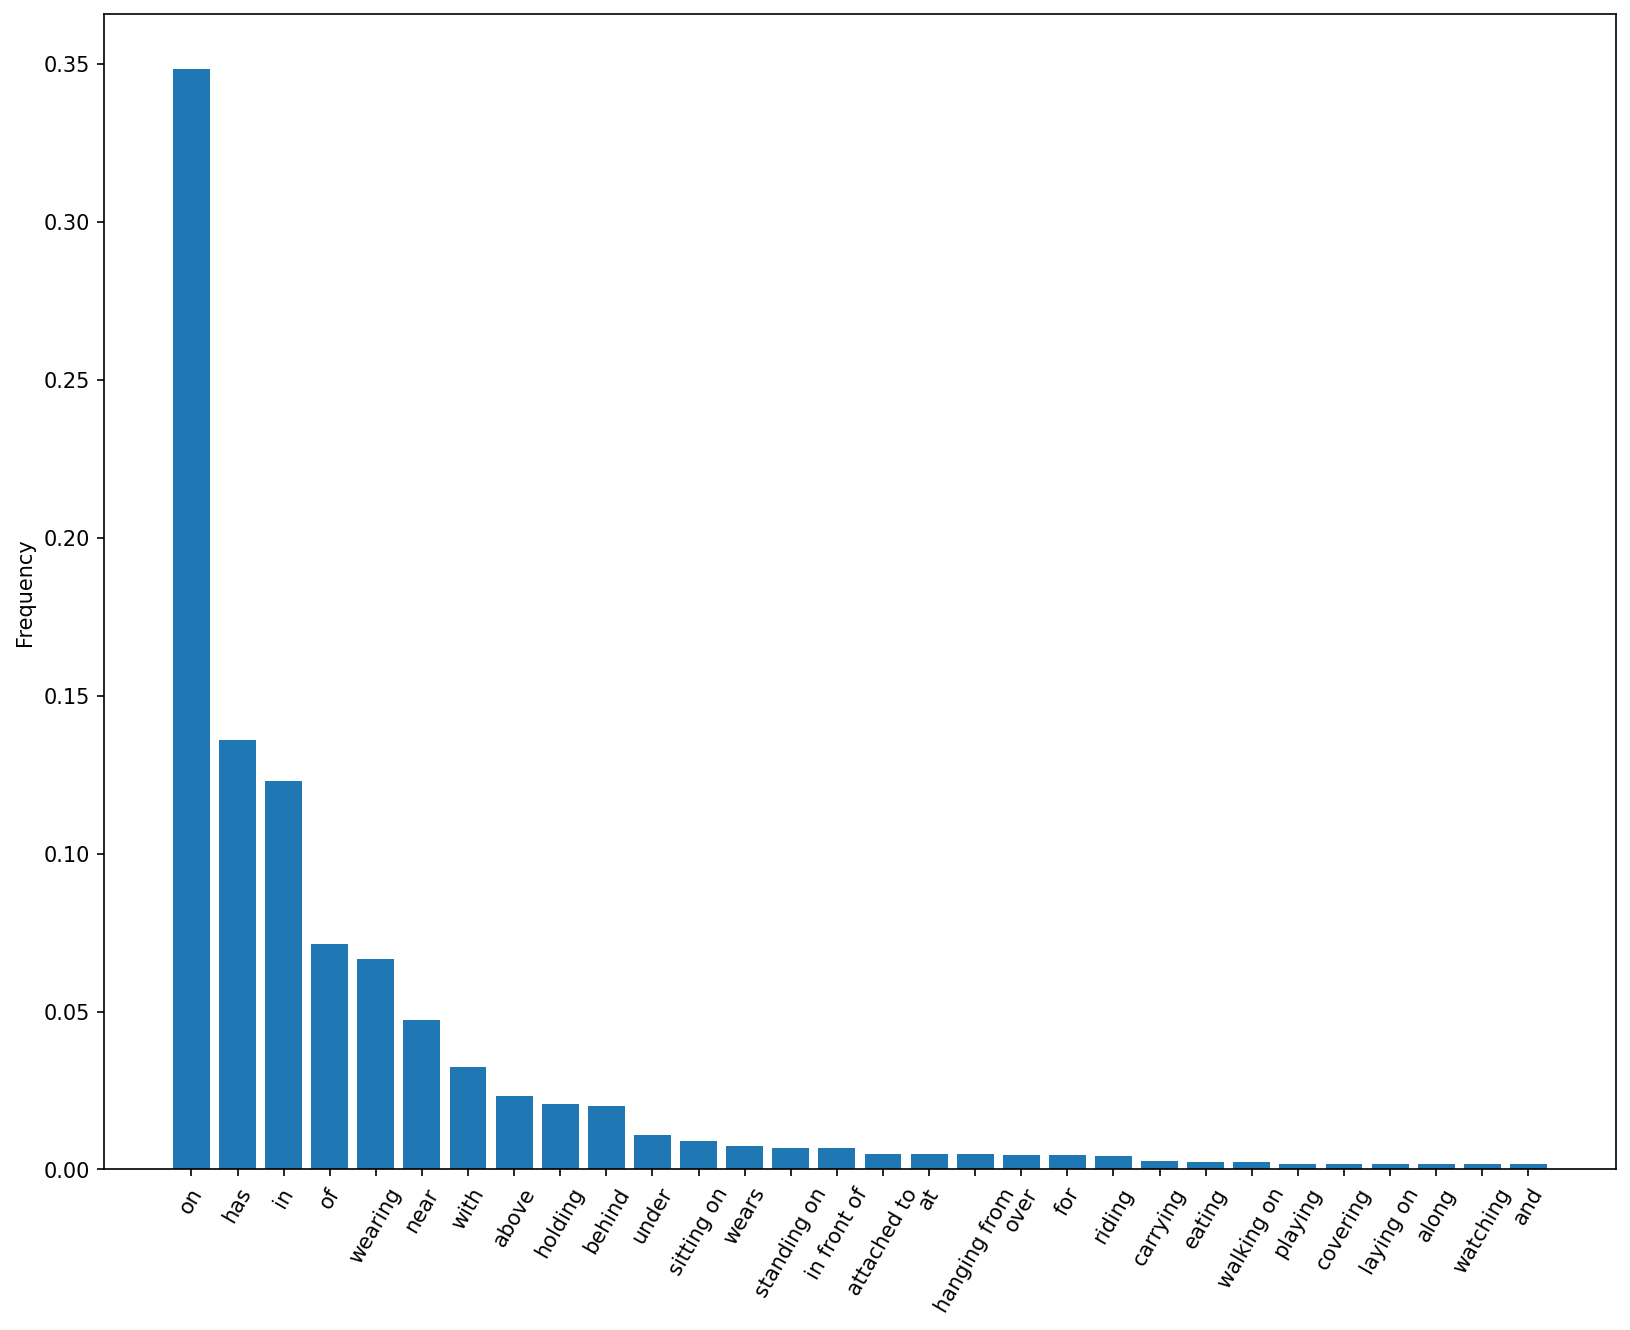

[31, 20, 22, 30, 48, 29, 50, 1, 21, 8, 43, 40, 49, 41, 23, 7, 6, 19, 33, 16]


In [31]:
# Plotting the predicate frequency
plt.figure(figsize=(15,10))
freq = np.array(list(predicate_count.values())) / sum(predicate_count.values())
plt.bar(predicate_count.keys(), freq)
plt.xticks(rotation=90)
plt.show()

# sorting the predicates based on frequency
sorted_predicate_count = {k: v for k, v in sorted(predicate_count.items(), key=lambda item: item[1], reverse=True)}

# Plotting the top 20 predicates
plt.figure(figsize=(13,10), dpi=150)
freq = np.array(list(sorted_predicate_count.values()))[:30] / sum(sorted_predicate_count.values())
plt.bar(list(sorted_predicate_count.keys())[:30], freq)
plt.xticks(rotation=60)
plt.ylabel("Frequency")
plt.show()

# Find the indices for the top 20 predicates
top_predicates = list(sorted_predicate_count.keys())[:20]
top_predicate_indices = [predicate_to_idx[p] for p in top_predicates]
print(top_predicate_indices)

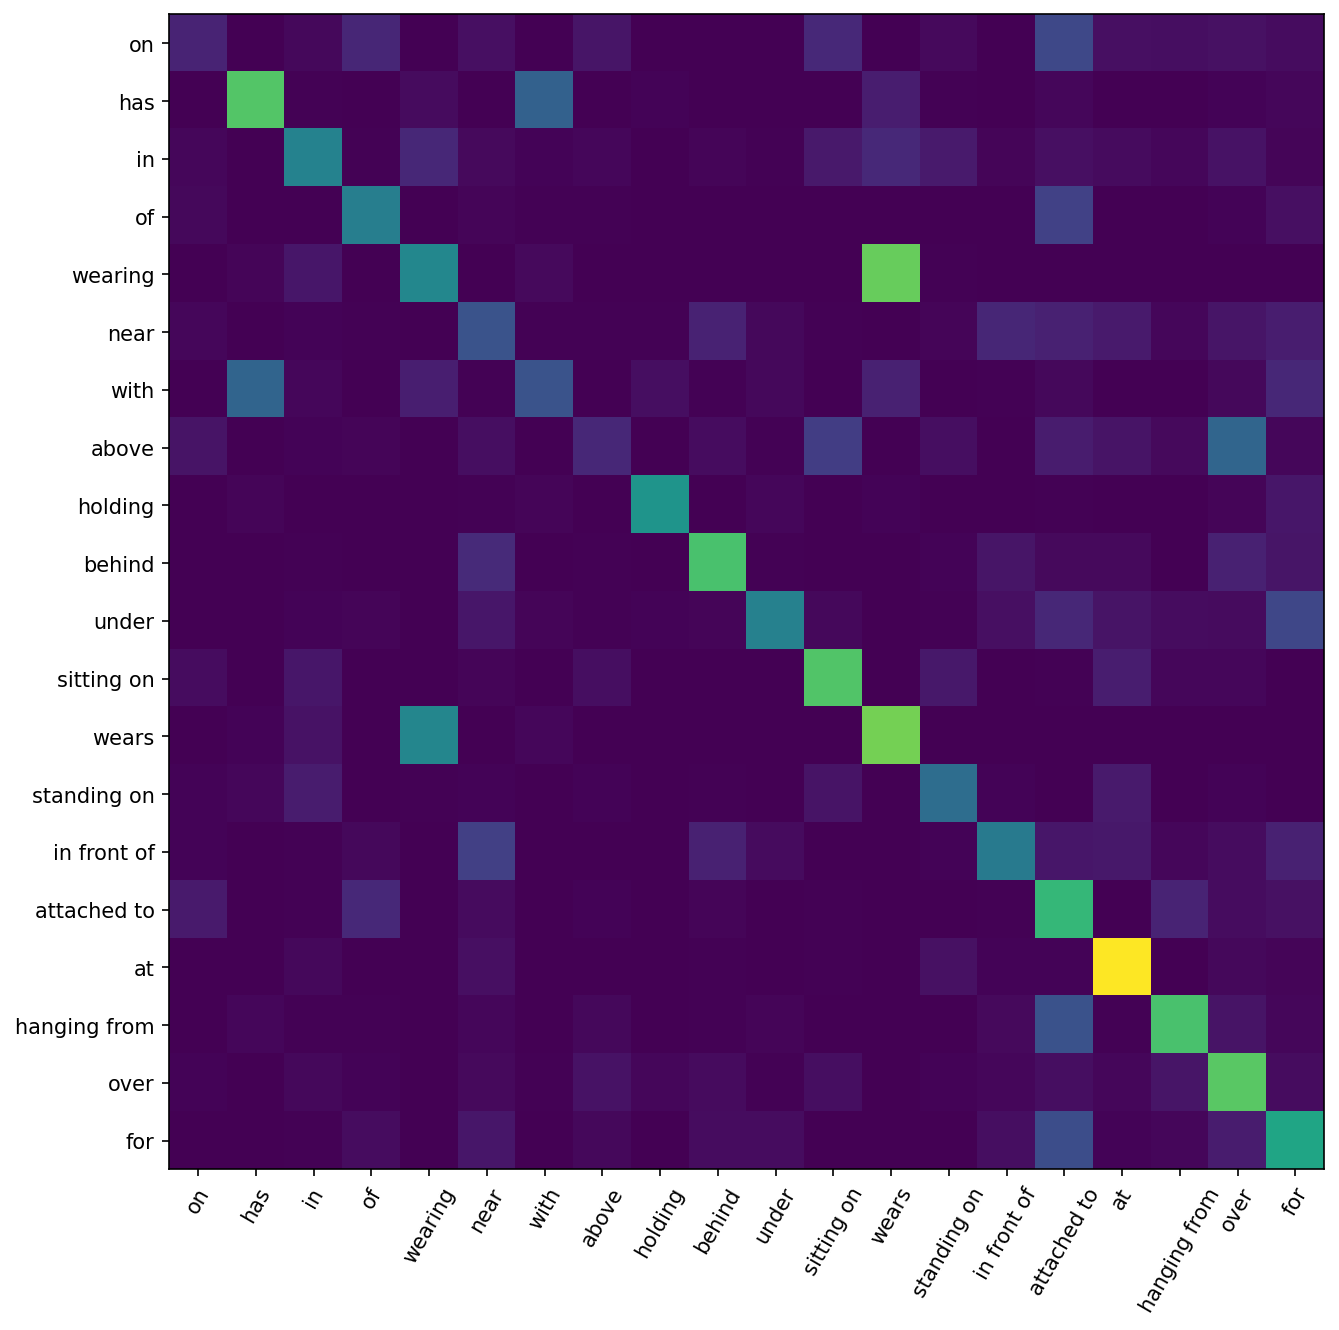

In [33]:
confusion_path = '/home/ce/10708-Final/ipynb/eval_predcls/confusion_matrix.npy'
# confusion_matrix = np.load(confusion_path)
# confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)
initial_conf_matrix = np.load(confusion_path)
initial_conf_matrix[0, :] = 0.0
initial_conf_matrix[:, 0] = 0.0
initial_conf_matrix[0, 0] = 1.0
initial_conf_matrix = initial_conf_matrix / (initial_conf_matrix.sum(-1)[:, None] + 1e-8)
# Plotting the confusion matrix for top 20 predicates
plt.figure(figsize=(10,10), dpi=150)
plt.imshow(initial_conf_matrix[top_predicate_indices][:, top_predicate_indices])
# assigning the labels
plt.xticks(range(20), top_predicates, rotation=60)
plt.yticks(range(20), top_predicates)
plt.show()
